<div style="display: flex; align-items: center;">
    <img src="https://github.com/nagelt/Teaching_Scripts/raw/9d9e29ecca4b04eaf7397938eacbf116d37ddc93/Images/TUBAF_Logo_blau.png" width="500" height="auto" height="auto" style="margin-right: 100px;" />
    <div>
        <p><strong>Prof. Dr. Thomas Nagel</strong></p>
        <p>Chair of Soil Mechanics and Foundation Engineering<br>Geotechnical Institute<br>Technische Universität Bergakademie Freiberg.</p>
        <p><a href="https://tu-freiberg.de/en/soilmechanics">https://tu-freiberg.de/en/soilmechanics</a></p>
    </div>
</div>

In [1]:
#HIDDEN
import matplotlib.pyplot as plt
import numpy as np

#Some plot settings
import plot_functions.plot_settings

# Zahlenbeispiel Kompressibilität des Porenfluids bei annähernder Sättigung

Gegeben ist die Beziehung

$$
    \beta_\text{F} = S \beta_\text{w} + \frac{1-S}{u_\text{g}}
$$

Der Kompressionsmodul von Wasser beträgt bei atmosphärischem Druck etwa $K_\text{w} = 2.1$ GPa. Damit ergibt sich die Kompressibilität zu $\beta_\text{w} = 4.8 \cdot 10^{-5}$ bar$^{-1}$ $= 4.8 \cdot 10^{-10}$ Pa$^{-1}$.

Sei der Gasdruck konstant zu $u_\text{g} = 1$ bar gegeben, was für viele bodenmechanische Standardanwendungen eine gute Näherung darstellt, dann können wir die Kompressibilität in Abhängigkeit der Sättigung darstellen.

In [2]:
#HIDDEN
beta_w = 1./(2.1e9) # in 1/Pa
beta_w

4.761904761904762e-10

In [3]:
#HIDDEN
compressibility = lambda S: S*beta_w + (1.-S)/1.e5 #in 1/Pa

In [4]:
#HIDDEN
S = np.linspace(0.9,1,100)

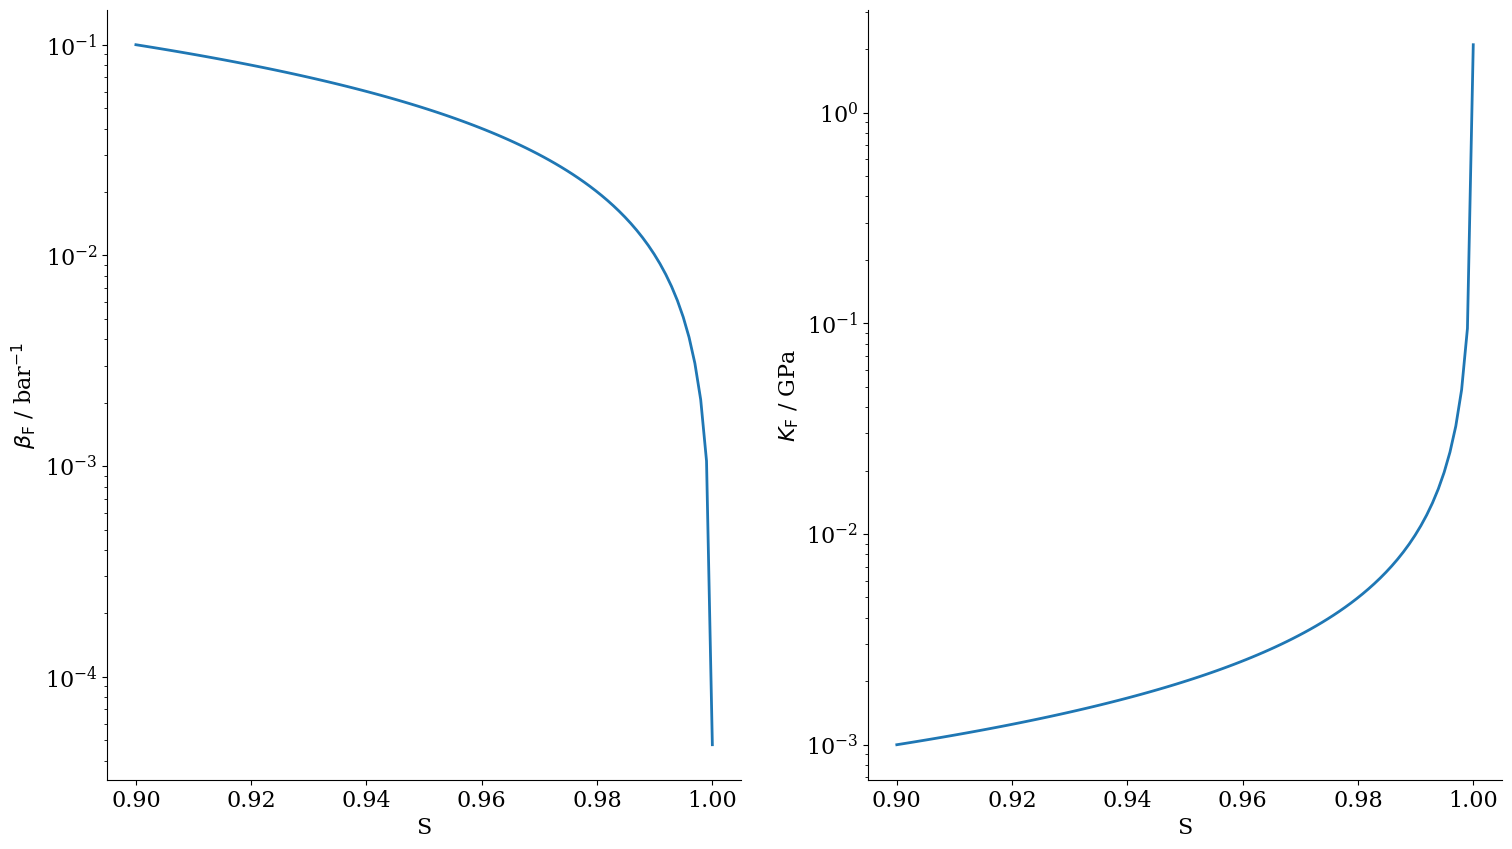

In [5]:
#HIDDEN
fig, ax = plt.subplots(ncols=2,figsize=(18,10))
#compressibility
ax[0].plot(S,compressibility(S)*1.e5)
ax[0].set_yscale('log')
ax[0].set_xlabel(r'S')
ax[0].set_ylabel(r'$\beta_\mathrm{F}$ / bar$^{-1}$')

#bulk modulus
ax[1].plot(S,1.e-9/compressibility(S))
ax[1].set_yscale('log')
ax[1].set_xlabel(r'S')
ax[1].set_ylabel(r'$K_\mathrm{F}$ / GPa');

Man sieht den starken Anstieg der Kompressibilität über mehrere Größenordnungen sobald geringe Mengen Gas im Porenraum vorhanden sind, was praktisch immer der Fall ist. Entsprechend Fällt der Kompressionsmodul.

**Frage:** Um wie viel höher ist die Kompressibilität bei 1% Gasanteil verglichen mit einem vollständig gesättigten Boden? Um wie viel höher ist sie bei einem Gasanteil von 5% verglichen mit 1%?

### Illustration of influence on soil/rock compressibility and P-wave velocity

Parameters from Steeb et al. (2013).

Calculated with Gassmann-Wood limits and ideal gas law.

Frequencies subcritical (all phases contribute to inertia, no phase-shift).

To do: check Gassmann-Hill for non-equilibrated / patchy saturation states. Add higher-frequency cases.

In [6]:
#HIDDEN
R = 8.315
Mw = 0.028
T = 293.75

K_S = 30e9
Kp = 1e9
G = 1.87e9
K_w = 2.25e9
K_G = lambda p: p

alpha = 1-Kp/K_S
n = 0.23

rho = lambda S,p=1e5: (1000 * S + (1-S) * p*Mw/(R*T))*n + (1-n)*2600

K_F = lambda S,p: 1/(S/K_w + (1-S)/K_G(p))
K = lambda S,p: Kp + alpha**2/((alpha-n)/K_S + n/K_F(S,p))

M = lambda S,p: K(S,p) + 4/3*G

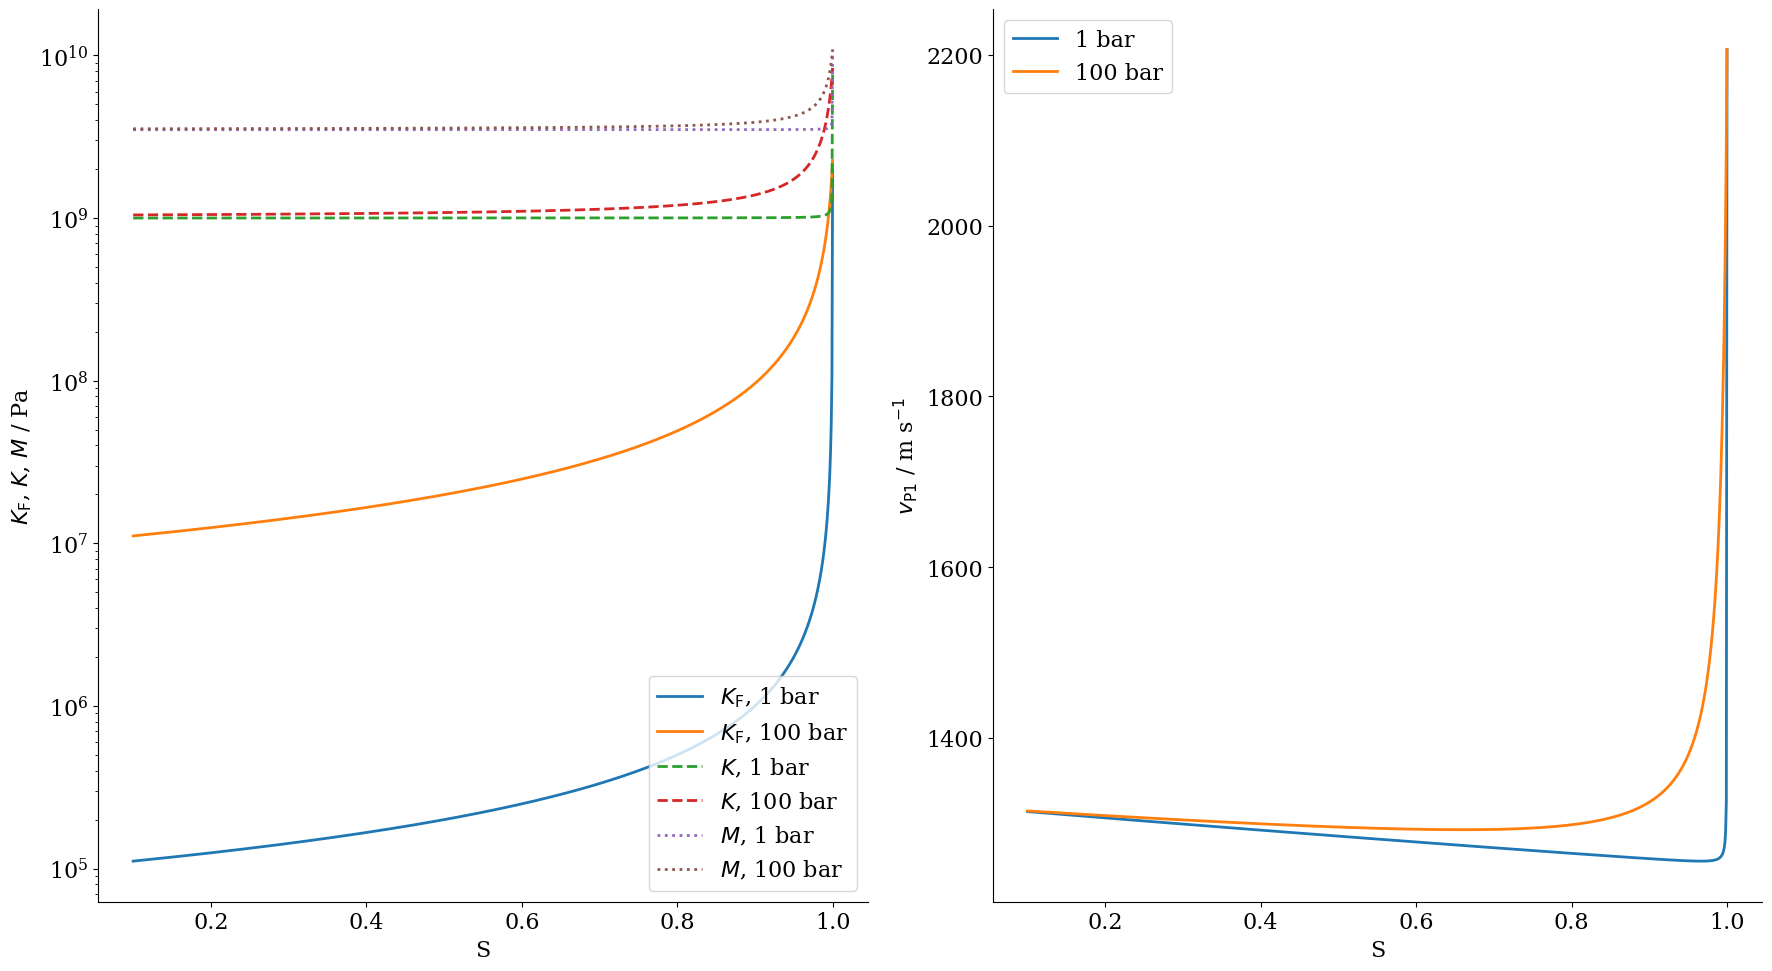

In [7]:
#HIDDEN
S = np.linspace(0.1,1,1000)
fig, ax = plt.subplots(ncols=2,figsize=(18,10))
#compressibility
ax[0].plot(S,K_F(S,1e5), label=r'$K_\mathrm{F}$, 1 bar')
ax[0].plot(S,K_F(S,1e7), label=r'$K_\mathrm{F}$, 100 bar')
ax[0].plot(S,K(S,1e5),ls='--', label=r'$K$, 1 bar')
ax[0].plot(S,K(S,1e7),ls='--', label=r'$K$, 100 bar')
ax[0].plot(S,M(S,1e5),ls=':', label=r'$M$, 1 bar')
ax[0].plot(S,M(S,1e7),ls=':', label=r'$M$, 100 bar')
ax[0].set_yscale('log')
ax[0].set_xlabel(r'S')
ax[0].set_ylabel(r'$K_\mathrm{F}$, $K$, $M$ / Pa')
ax[0].legend()

#bulk modulus
ax[1].plot(S,np.sqrt(M(S,1e5)/rho(S,1e5)),label=r'1 bar')
ax[1].plot(S,np.sqrt(M(S,1e7)/rho(S,1e7)),label=r'100 bar')
#ax[1].set_yscale('log')
ax[1].set_xlabel(r'S')
ax[1].set_ylabel(r'$v_\mathrm{P1}$ / m s$^{-1}$')
ax[1].legend()
fig.tight_layout();

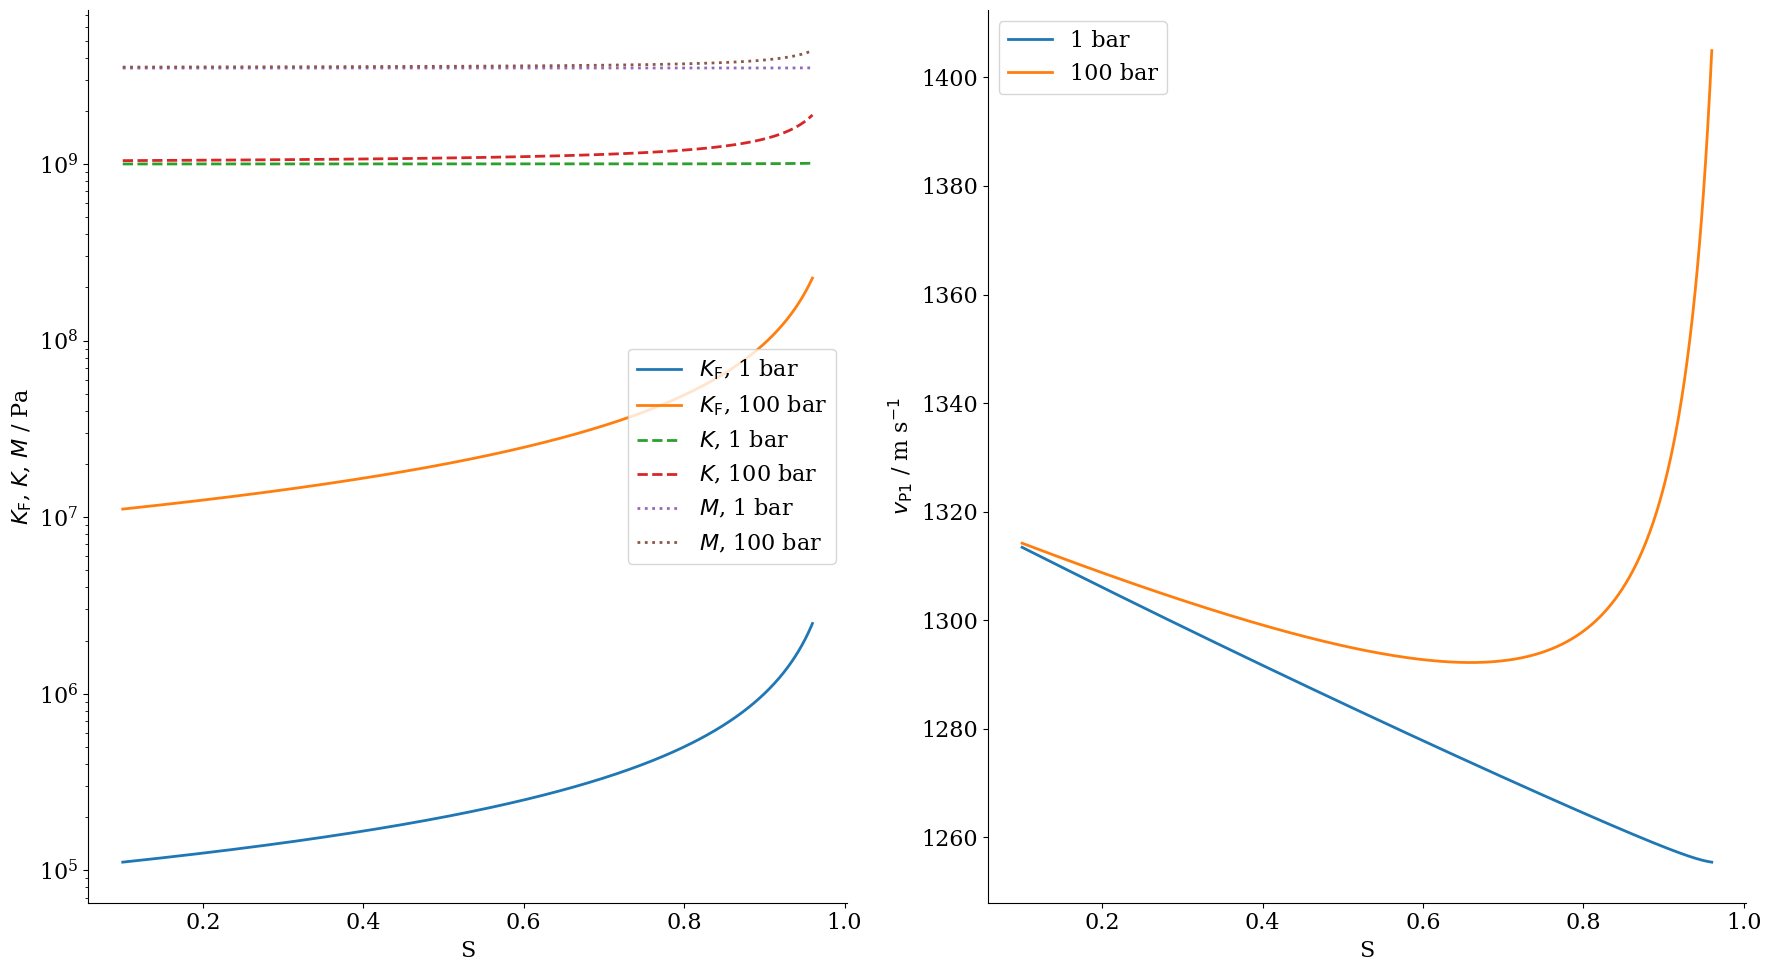

In [8]:
#HIDDEN
S = np.linspace(0.1,0.96,1000)
fig, ax = plt.subplots(ncols=2,figsize=(18,10))
#compressibility
ax[0].plot(S,K_F(S,1e5), label=r'$K_\mathrm{F}$, 1 bar')
ax[0].plot(S,K_F(S,1e7), label=r'$K_\mathrm{F}$, 100 bar')
ax[0].plot(S,K(S,1e5),ls='--', label=r'$K$, 1 bar')
ax[0].plot(S,K(S,1e7),ls='--', label=r'$K$, 100 bar')
ax[0].plot(S,M(S,1e5),ls=':', label=r'$M$, 1 bar')
ax[0].plot(S,M(S,1e7),ls=':', label=r'$M$, 100 bar')
ax[0].set_yscale('log')
ax[0].set_xlabel(r'S')
ax[0].set_ylabel(r'$K_\mathrm{F}$, $K$, $M$ / Pa')
ax[0].legend()

#bulk modulus
ax[1].plot(S,np.sqrt(M(S,1e5)/rho(S,1e5)),label=r'1 bar')
ax[1].plot(S,np.sqrt(M(S,1e7)/rho(S,1e7)),label=r'100 bar')
#ax[1].set_yscale('log')
ax[1].set_xlabel(r'S')
ax[1].set_ylabel(r'$v_\mathrm{P1}$ / m s$^{-1}$')
ax[1].legend()
fig.tight_layout();